In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway
import numpy as np

In [34]:
url = './Datasets/food_wastage_data.csv'
df = pd.read_csv(url)

In [35]:
df.head()

,Type of Food,Number of Guests,Event Type,Quantity of Food,Storage Conditions,Purchase History,Seasonality,Preparation Method,Geographical Location,Pricing,Wastage Food Amount
0,Meat,310,Corporate,450,Refrigerated,Regular,All Seasons,Buffet,Urban,Low,25
1,Meat,400,Birthday,500,Room Temperature,Regular,Winter,Buffet,Suburban,High,40
2,Vegetables,302,Birthday,371,Refrigerated,Regular,Summer,Buffet,Suburban,Low,27
3,Meat,491,Birthday,497,Refrigerated,Regular,All Seasons,Finger Food,Rural,High,32
4,Meat,300,Corporate,400,Refrigerated,Regular,Winter,Finger Food,Urban,Moderate,25


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1782 entries, 0 to 1781
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Type of Food           1782 non-null   object
 1   Number of Guests       1782 non-null   int64 
 2   Event Type             1782 non-null   object
 3   Quantity of Food       1782 non-null   int64 
 4   Storage Conditions     1782 non-null   object
 5   Purchase History       1782 non-null   object
 6   Seasonality            1782 non-null   object
 7   Preparation Method     1782 non-null   object
 8   Geographical Location  1782 non-null   object
 9   Pricing                1782 non-null   object
 10  Wastage Food Amount    1782 non-null   int64 
dtypes: int64(3), object(8)
memory usage: 153.3+ KB


In [37]:
df.describe()

,Number of Guests,Quantity of Food,Wastage Food Amount
count,1782.000000,1782.000000,1782.000000
mean,317.804714,411.125701,28.536476
std,67.829658,65.204674,10.461317
min,207.000000,280.000000,10.000000
25%,267.000000,350.000000,20.000000
50%,302.000000,400.000000,26.500000
75%,350.000000,480.000000,35.000000
max,491.000000,500.000000,63.000000


In [38]:
target = 'Wastage Food Amount'
categorical_vars = df.select_dtypes(include='object').columns.tolist()
numeric_vars = df.select_dtypes(include='number').drop(columns=[target]).columns.tolist()

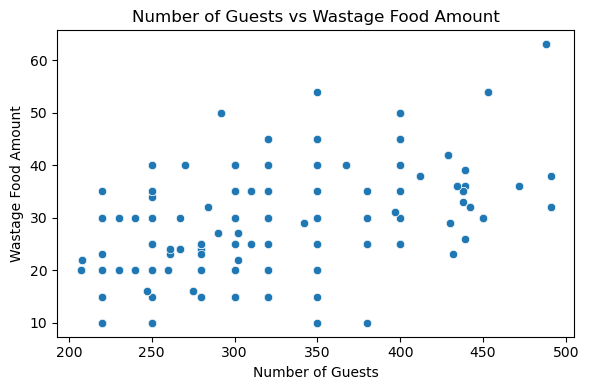

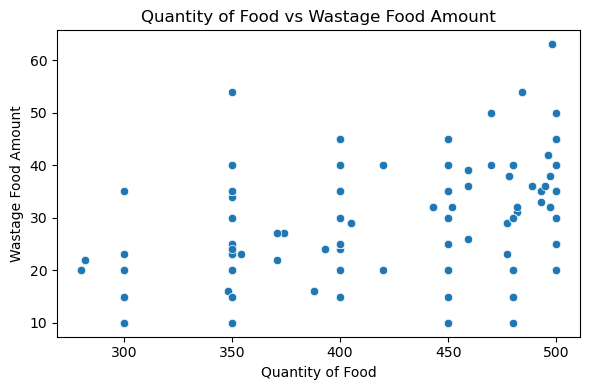

In [39]:
for col in numeric_vars:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=df, x=col, y=target)
    plt.title(f'{col} vs {target}')
    plt.tight_layout()
    plt.show()

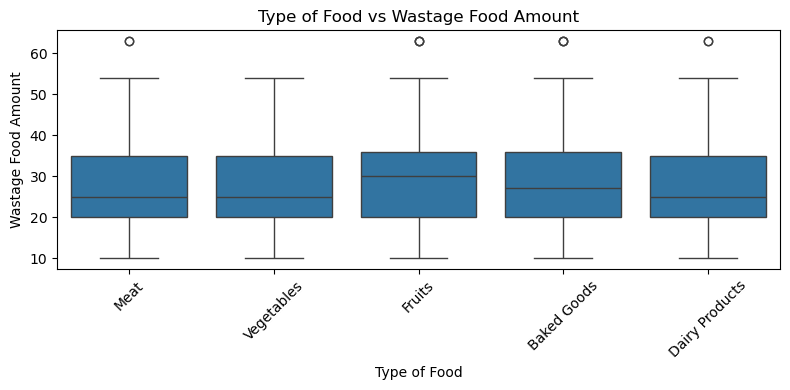

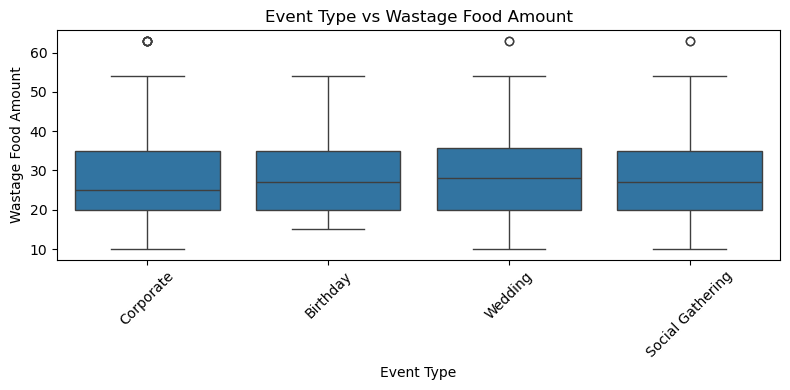

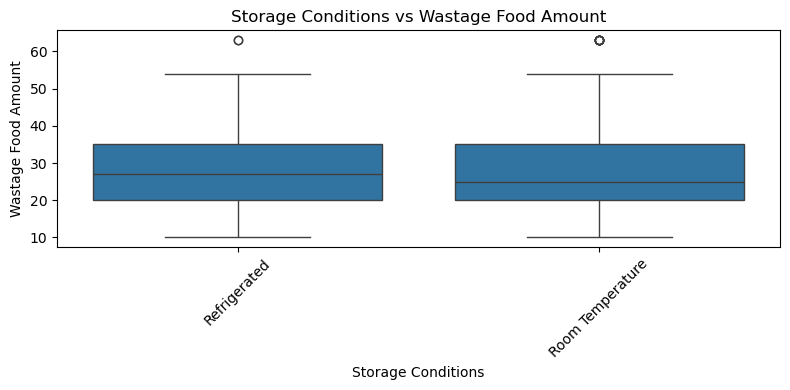

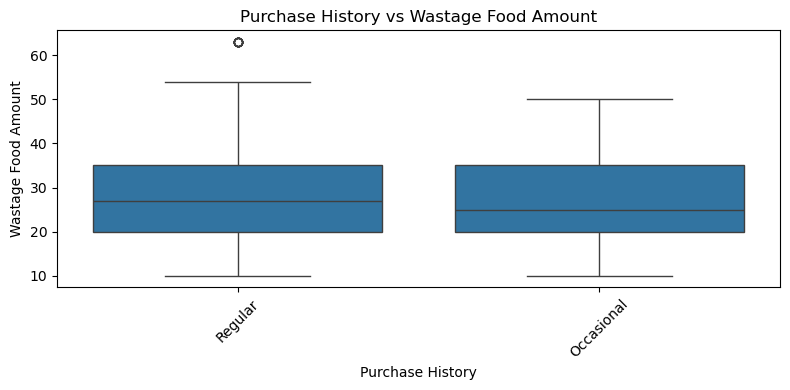

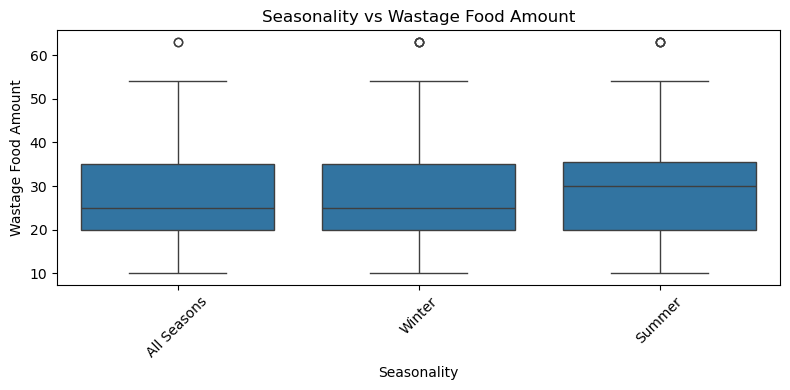

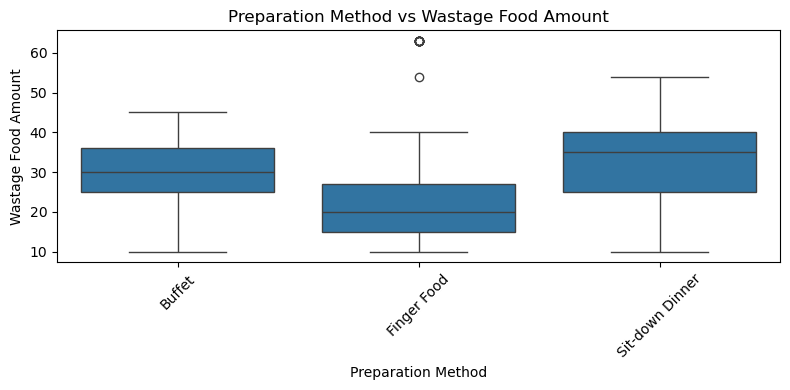

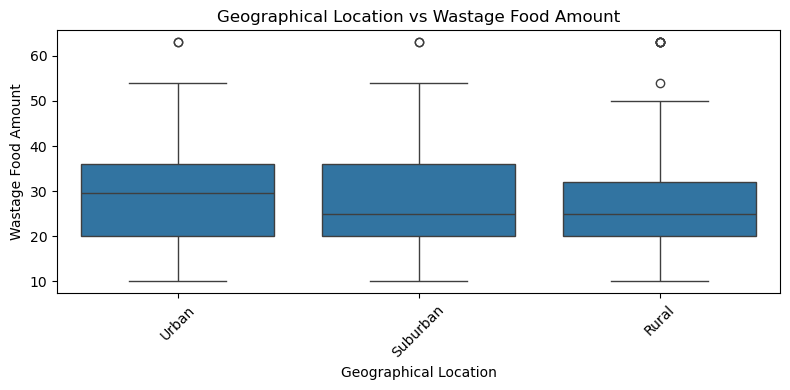

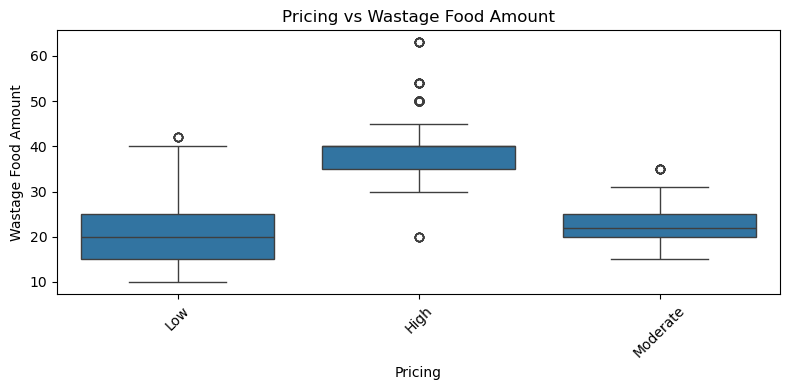

In [40]:
for col in categorical_vars:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df, x=col, y=target)
    plt.xticks(rotation=45)
    plt.title(f'{col} vs {target}')
    plt.tight_layout()
    plt.show()

In [41]:
anova_results = {}
for var in categorical_vars:
    groups = [group[target].values for name, group in df.groupby(var)]
    f_stat, p_val = f_oneway(*groups)
    anova_results[var] = p_val

# Sort results by significance
anova_results_sorted = dict(sorted(anova_results.items(), key=lambda item: item[1]))
anova_results_sorted

#p-value range meaning:
#< 0.05: Statistically significant: at least one category has a different mean
#> 0.05: Not significant: means are likely similar across all categories

{'Pricing': np.float64(0.0),
 'Preparation Method': np.float64(6.129725648060615e-81),
 'Geographical Location': np.float64(0.0005843507238671512),
 'Type of Food': np.float64(0.1408682559924499),
 'Seasonality': np.float64(0.17746244100275899),
 'Storage Conditions': np.float64(0.20746003989942788),
 'Purchase History': np.float64(0.25575264168410533),
 'Event Type': np.float64(0.46803140526687803)}

In [80]:
independent_variable = ['Type of Food', 'Event Type', 'Preparation Method', 'Pricing', 'Number of Guests', 'Quantity of Food']
ideal_df = df[independent_variable]
ideal_df

,Type of Food,Event Type,Preparation Method,Pricing,Number of Guests,Quantity of Food
0,Meat,Corporate,Buffet,Low,310,450
1,Meat,Birthday,Buffet,High,400,500
2,Vegetables,Birthday,Buffet,Low,302,371
3,Meat,Birthday,Finger Food,High,491,497
4,Meat,Corporate,Finger Food,Moderate,300,400
...,...,...,...,...,...,...
1777,Baked Goods,Corporate,Finger Food,High,310,350
1778,Baked Goods,Social Gathering,Buffet,Low,284,443
1779,Fruits,Wedding,Finger Food,Moderate,220,300
1780,Fruits,Wedding,Finger Food,Moderate,250,350


In [89]:
df_encoded = pd.get_dummies(ideal_df, drop_first=True).astype(int)
df_encoded

,Number of Guests,Quantity of Food,Type of Food_Dairy Products,Type of Food_Fruits,Type of Food_Meat,Type of Food_Vegetables,Event Type_Corporate,Event Type_Social Gathering,Event Type_Wedding,Preparation Method_Finger Food,Preparation Method_Sit-down Dinner,Pricing_Low,Pricing_Moderate
0,310,450,0,0,1,0,1,0,0,0,0,1,0
1,400,500,0,0,1,0,0,0,0,0,0,0,0
2,302,371,0,0,0,1,0,0,0,0,0,1,0
3,491,497,0,0,1,0,0,0,0,1,0,0,0
4,300,400,0,0,1,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1777,310,350,0,0,0,0,1,0,0,1,0,0,0
1778,284,443,0,0,0,0,0,1,0,0,0,1,0
1779,220,300,0,1,0,0,0,0,1,1,0,0,1
1780,250,350,0,1,0,0,0,0,1,1,0,0,1


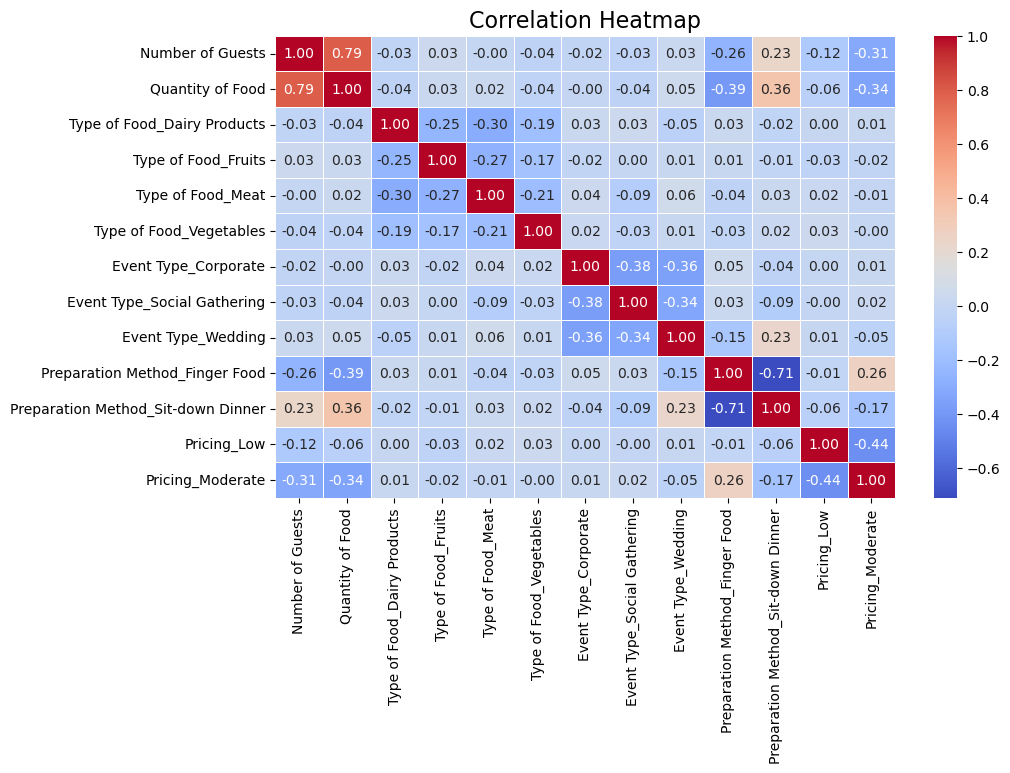

In [90]:
# Correlation matrix
corr_matrix = df_encoded.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

# Create a heatmap for the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Title for the heatmap
plt.title("Correlation Heatmap", fontsize=16)

# Show the heatmap
plt.show()

In [92]:
from numpy.linalg import eigvals

# Calculate the condition index
eigenvalues = eigvals(corr_matrix)
condition_index = max(eigenvalues) / min(eigenvalues)

print(f'Condition Index: {condition_index}')

Condition Index: 13.875125531667805


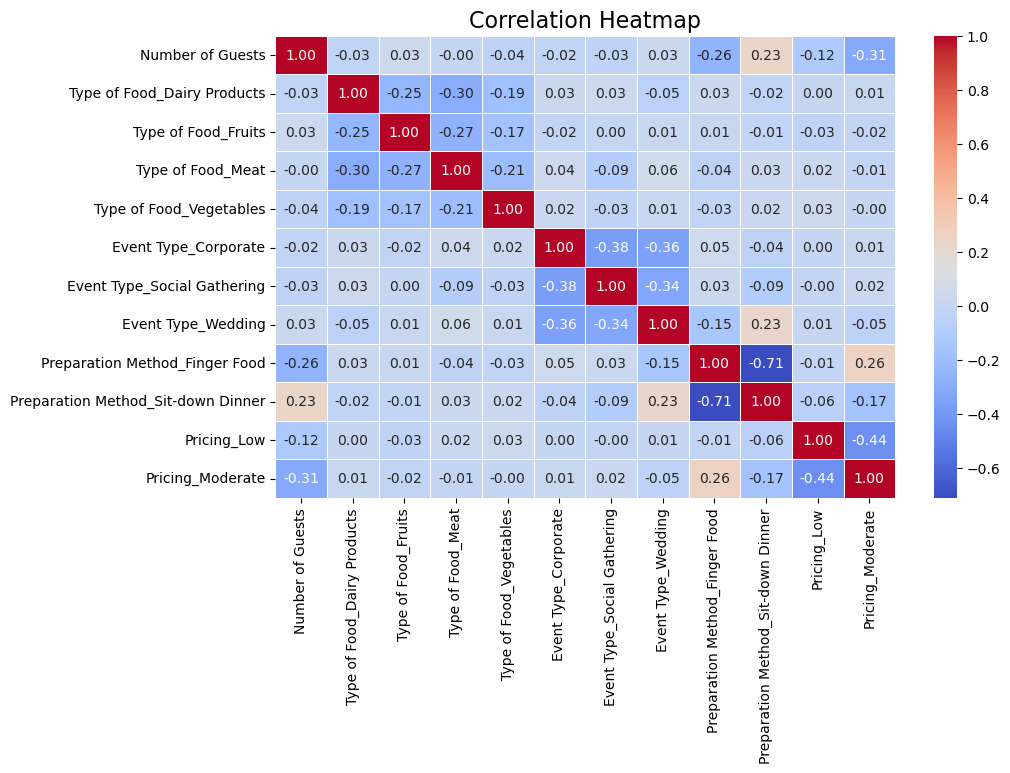

In [93]:
independent_variable = ['Type of Food', 'Event Type', 'Preparation Method', 'Pricing', 'Number of Guests']
ideal_df = df[independent_variable]
df_encoded = pd.get_dummies(ideal_df, drop_first=True).astype(int)
corr_matrix = df_encoded.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()